In [5]:
import pandas as pd
import numpy as np

Creating predictive model to predict wheather the placement will happen or not on the basis of iq and cgpa of student ?

In [6]:
df = pd.read_csv('placement.csv')

In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [8]:
df.shape

(100, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [10]:
df = df.iloc[:,1:]

In [11]:
#steps
#0-Preprocess + EDA + Feature Selection
#1-Extract input & output colms
#2-Scale the values
#3-Train Test Split
#4-Train the model
#5-Evaluate the model/ Model Selection
#6-Deploy the model


In [12]:
#EDA

In [13]:
import matplotlib.pyplot as plt

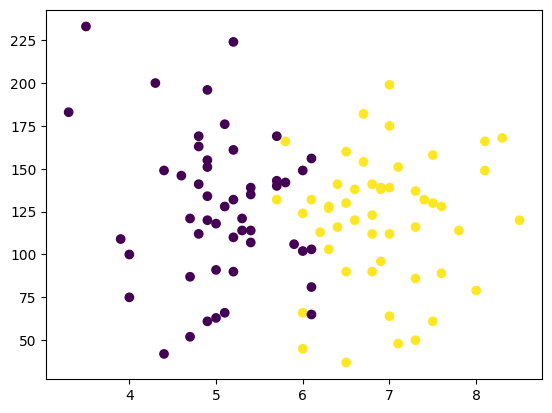

In [14]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [15]:
#Here pts which represent
# yellow--> not placed
# blue--> placed

In [16]:
#Now we will try to create model for prediction using logistic regression


In [17]:
#first we will store independent vari. in X variable & dependent variable in y variable
X = df.iloc[:,0:2]
y= df.iloc[:,-1]

In [18]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [19]:
y.head()

,placement
0,1
1,0
2,0
3,1
4,0


In [20]:
#Now train test split
from sklearn.model_selection import train_test_split

In [21]:
train_test_split(X,y,test_size=0.1)

[    cgpa     iq
 68   4.0   75.0
 40   4.9  134.0
 51   4.8  141.0
 69   8.5  120.0
 9    5.1   66.0
 ..   ...    ...
 66   6.9   96.0
 36   5.7  140.0
 88   4.4  149.0
 86   5.1  128.0
 73   4.9   61.0
 
 [90 rows x 2 columns],
     cgpa     iq
 7    5.0   63.0
 92   5.2  110.0
 39   4.6  146.0
 1    5.9  106.0
 31   3.9  109.0
 84   5.7  169.0
 21   7.1  151.0
 13   6.4  116.0
 35   6.8   90.0
 3    7.4  132.0,
 68    0
 40    0
 51    0
 69    1
 9     0
      ..
 66    1
 36    0
 88    0
 86    0
 73    0
 Name: placement, Length: 90, dtype: int64,
 7     0
 92    0
 39    0
 1     0
 31    0
 84    0
 21    1
 13    1
 35    1
 3     1
 Name: placement, dtype: int64]

In [22]:
# Above we are splitting the dataset in X-train,X-test,Y-train,Y-test,
# so we want store them differently so

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [24]:
#Now we will scale our data
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
#So now all values will be between -1 to 1
X_train

array([[-1.02769476,  1.76075386],
       [-2.46168744,  1.4397188 ],
       [-0.75882113,  2.45221401],
       [ 0.22704884,  0.05679851],
       [ 0.67517155, -0.85691668],
       [-0.57957204,  0.35313857],
       [-0.04182479, -1.4495968 ],
       [ 0.85442064, -0.31362656],
       [-1.56544201,  1.85953388],
       [ 1.3921679 , -0.88161168],
       [-0.31069841,  0.18027354],
       [ 1.12329427, -1.84471688],
       [ 0.58554701,  0.72356365],
       [-1.02769476,  0.64947863],
       [-1.02769476, -1.57307183],
       [ 1.57141698, -0.26423655],
       [ 0.40629793, -2.16575195],
       [-0.93807021, -1.52368181],
       [ 1.21291881,  0.18027354],
       [ 0.1374243 , -0.28893156],
       [ 0.94404518,  0.64947863],
       [-2.28243835,  2.67446905],
       [ 0.31667338, -0.21484654],
       [ 0.85442064,  1.24215876],
       [ 0.67517155,  0.40252858],
       [-0.04182479,  0.60008862],
       [-0.04182479, -1.96819191],
       [ 0.85442064,  1.83483888],
       [ 0.7647961 ,

In [28]:
X_test = scaler.fit_transform(X_test)

In [29]:
#Now model training using Logistic Regression
from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression()

In [31]:
#Model Training
clf.fit(X_train,y_train)

LogisticRegression()

In [32]:
#Trying to predict on remaining data
clf.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [33]:
y_test

,placement
41,0
32,1
59,0
96,0
40,0
2,0
24,0
68,0
37,1
63,1


In [34]:
#Now we want to check which wheather our model predicting correctly or not
# so we store predicted reults in new vari-->y_pred and tried to compary with orginal val y_test

In [35]:
y_pred = clf.predict(X_test)

In [36]:
# to check accuracy we use
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_pred,y_test)

1.0

In [38]:
# Now how to plot decision boundary ,which is
# what patterns did our model found in data(this can be visualize using decision boundaries)

In [39]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

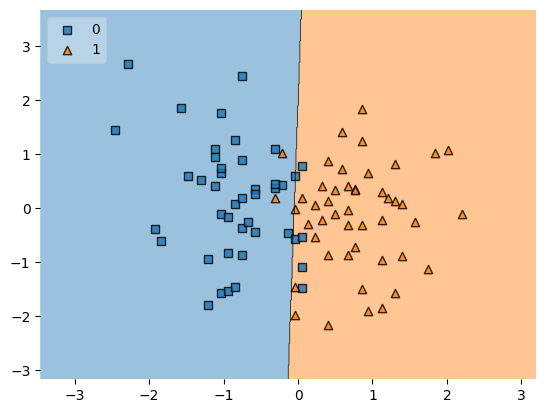

In [40]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

In [41]:
# Now we will convert our classifier that is consider as a object in python into file,
# so that we can deploy that file on the website to use

In [44]:
import pickle

In [45]:
pickle.dump(clf,open('model.pkl','wb'))